In [2]:
import ast 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Dataset containing only data from Poland

In [3]:
df_poland = df[(df["job_country"] == "Poland")] 
df_poland

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
108,Data Engineer,Chapter Lead Data Engineers Poland,"Wrocław, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-16 13:58:03,False,False,Poland,None,NaN,NaN,Volvo Group,"[azure, excel, unity]","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
125,Data Engineer,Data Engineer,"Kraków, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-04 14:12:20,True,False,Poland,None,NaN,NaN,SII Group,"[sql, shell, python, aws]","{'cloud': ['aws'], 'programming': ['sql', 'she..."
136,Data Scientist,Mid/ Senior Data Scientist with NLP,Anywhere,via LinkedIn,Full-time,True,Poland,2023-12-21 13:10:55,False,False,Poland,None,NaN,NaN,Trans.eu Group,"[python, sql, snowflake, aws, scikit-learn, ke...","{'cloud': ['snowflake', 'aws'], 'libraries': [..."
351,Software Engineer,Data Platform Software Engineer,"Warsaw, Poland",via Adzuna.pl,Full-time,False,Poland,2023-06-23 13:58:41,True,False,Poland,None,NaN,NaN,IBM,"[python, sql, shell, ibm cloud, linux]","{'cloud': ['ibm cloud'], 'os': ['linux'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785549,Data Scientist,Data Scientist,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:55,False,False,Poland,None,NaN,NaN,Citi,"[python, r]","{'programming': ['python', 'r']}"
785592,Senior Data Analyst,VP - Institutional Credit Management - Lending...,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:53,True,False,Poland,None,NaN,NaN,Citi,None,None
785650,Software Engineer,Integration Analyst,"Łódź, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-04-26 06:24:52,False,False,Poland,None,NaN,NaN,Team Quest,"[sql, oracle, aws, sap, atlassian]","{'analyst_tools': ['sap'], 'cloud': ['oracle',..."
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,NaN,NaN,Digital Hub Warsaw At Bayer,"[python, aws, gcp, azure, tensorflow, pytorch,...","{'cloud': ['aws', 'gcp', 'azure'], 'libraries'..."


The count of numbers depends on the job title.

In [4]:
df_plot = df_poland["job_title_short"].value_counts().head(10).to_frame()

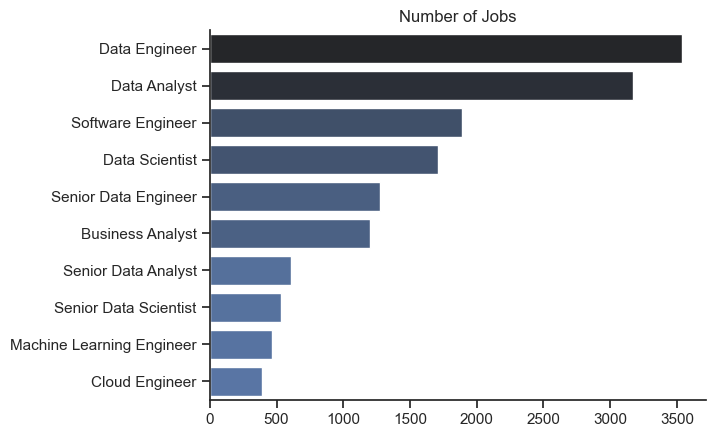

In [5]:
sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x ="count", y="job_title_short", hue="count", palette='dark:b_r', legend=False)
sns.despine()

plt.title("Number of Jobs")
plt.xlabel("")
plt.ylabel("")
plt.show()

The number of jobs depends on the month.

In [6]:
job_monthly = df.groupby(df['job_posted_date'].dt.to_period('M')).size().to_frame()
job_monthly = job_monthly.reset_index()


# job_monthly['month_name'] = job_monthly['job_posted_date'].dt.strftime('%b')
# job_monthly = job_monthly.drop(df['job_posted_date'], axis=1)

<Axes: >

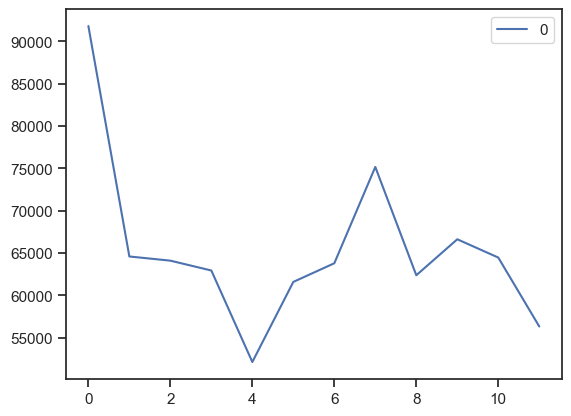

In [7]:
job_monthly.plot()

Features of jobs in Poland!

In [8]:
df_poland_health = df_poland["job_health_insurance"]
df_poland_health.value_counts()

job_health_insurance
False    14792
True         1
Name: count, dtype: int64

In [17]:
dict_column = {
    'job_work_from_home': "Work for Home Offered",
    "job_no_degree_mention": "Degree Requirement",

}

In [18]:
# categories = ["Full-time", "Part-time", "Contractor", "Internship"]
# for cat in categories:
#     df_poland[cat] = df_poland["job_schedule_type"].str.contains(cat, case=False, na=False).astype(int)
# totals = df_poland[categories].mul(df_poland[""], axis=0).sum()
# print(totals)

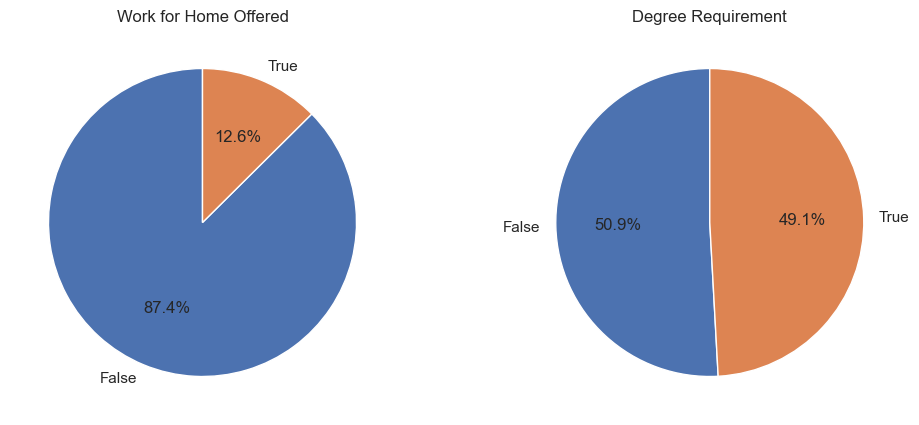

In [20]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_poland[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)



plt.show()